In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import axes3d
import matplotlib.cm as cm

In [3]:
plt.rcParams["figure.figsize"] = (12,12)
plt.rcParams.update({'font.size' : 18})

# U(t) = alpha_square   *   U(xx)  
Heat equation


In [4]:
a = 1 #thermal diffusivity const
L = 100 #length domain
N = 1000 #no. of descritization points
dx = L/N
x = np.arange(-L/2 , L/2 , dx)  # x-domain



In [5]:
#Define discrete wavenumbers
kappa = 2*np.pi * np.fft.fftfreq(N , d = dx )

In [6]:
#initial condtions
u0 = np.zeros_like(x)
u0[int((L/2 - L/10)/dx) : int((L/2 + L/10)/dx)] = 1
u0hat = np.fft.fft(u0)
                              

In [7]:
u0hat_ri = np.concatenate((u0hat.real , u0hat.imag))

Uhat(t) = -alpha_square x kappa_square x uhat

In [8]:
#simulate in fourier space 
dt = 0.1
t = np.arange(0,10 ,dt)


In [9]:
def rhsHeat(uhat_ri , kappa , a ,  t):
  uhat = uhat_ri[:N] + (1j) * uhat_ri[N:]
  d_uhat = -a**2 * (np.power(kappa , 2)) * uhat
  d_uhat_ri = np.concatenate((d_uhat.real , d_uhat.imag)).astype("float64")
  return d_uhat_ri

In [10]:
uhat_ri = odeint(rhsHeat , u0hat_ri , t , args = (kappa , a))

In [11]:
uhat = uhat_ri[: , :N] + (1j) * uhat_ri[:,N:]

In [12]:
u = np.zeros_like(uhat)

In [13]:
for k in range(len(t)):
  u[k,:] = np.fft.ifft(uhat[k , :])

In [14]:
u = u.real


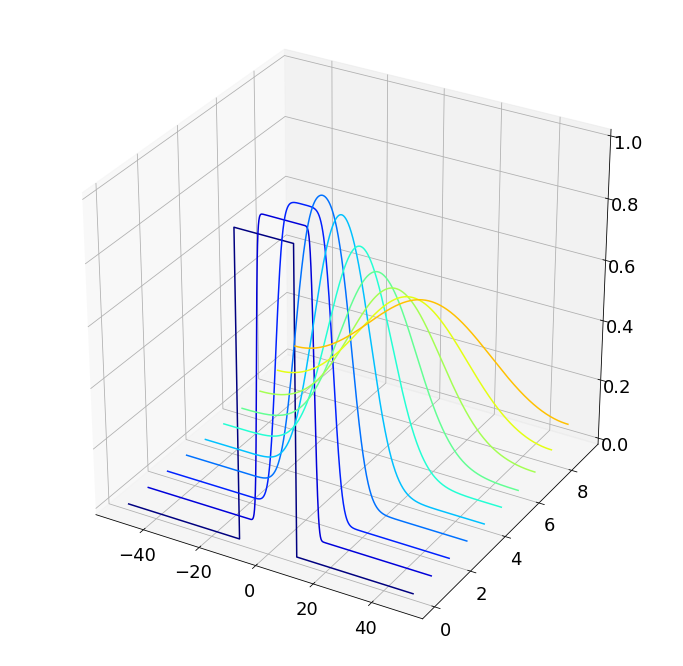

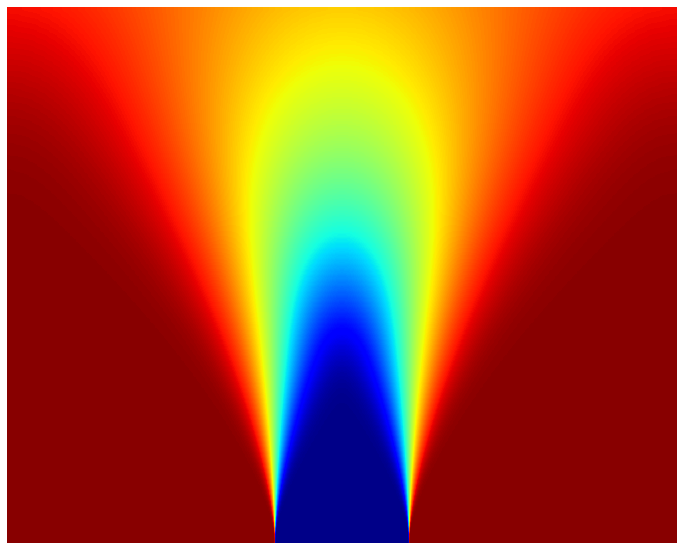

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111 , projection = "3d")
plt.set_cmap("jet_r")
u_plot = u[0:-1:10,:]
for j in range(u_plot.shape[0]):
  ys = j * np.ones(u_plot.shape[1])
  ax.plot(x,ys,u_plot[j,:], color = cm.jet(j*20))
  

plt.figure()
plt.imshow(np.flipud(u),aspect = 8)
plt.axis("off")
plt.set_cmap("jet_r")
plt.show()